In [2]:
pip install --upgrade google-api-python-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 4.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade google-auth-oauthlib google-auth-httplib2

Note: you may need to restart the kernel to use updated packages.


In [21]:
from config.config import YOUTUBE_API_KEY
from googleapiclient.discovery import build
from IPython.display import JSON

In [18]:
api_service_name = "youtube"
api_version = "v3"

youtube = build(
    api_service_name, api_version, developerKey=YOUTUBE_API_KEY)

In [19]:
channel_ids = [
    "UCRcHYvd4zi0ejbkQLo9raNw",
]

In [22]:
request = youtube.channels().list(
    part="snippet,contentDetails,statistics",
    id=",".join(channel_ids)
)
response = request.execute()

print(response)

{'kind': 'youtube#channelListResponse', 'etag': 'aYcHQ-GBTd42k2zr4agJjzAeSgM', 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5}, 'items': [{'kind': 'youtube#channel', 'etag': 'aL8V-6GhqvaLgM0uxsCpOCfndtY', 'id': 'UCRcHYvd4zi0ejbkQLo9raNw', 'snippet': {'title': "Amerika'da Bir Ada", 'description': "Merhabalar 🫶🏻 Benim ismim Ada, 2014’te basketbol bursuyla Amerika’ya gelip universite ve yuksek lisansimi tamamladiktan sonra evlendim & simdi Los Angeles’ta yasiyorum. Kanalimda Amerika'daki hayatimdan VLOGlar, saglikli yasam ve tarifler, seyahat videolari veya hayata dair duygu ve dusuncelerimden bahsettigim icerikler bulabilirsiniz 🤓 Eger siz de hayatima dahil olmak isterseniz, kanalima abone olmayi unutmayin!", 'customUrl': '@amerikadabirada', 'publishedAt': '2011-08-27T20:12:22Z', 'thumbnails': {'default': {'url': 'https://yt3.ggpht.com/B57PN9NtLPek8QTStISNyEMF423bgWfJQTev33uNrcbzbIrBPhvnLLVF0zV4AxaNE4oHD93t=s88-c-k-c0x00ffffff-no-rj', 'width': 88, 'height': 88}, 'medium': {'url': 'h

In [23]:
JSON(response)

<IPython.core.display.JSON object>

In [50]:
#kütüphaneleri içe aktardım
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [45]:
#Kanal istatistiklerini basic şekilde çektim
channel = response["items"][0]
title = channel["snippet"]["title"]
subs = channel["statistics"]["subscriberCount"]
views = channel["statistics"]["viewCount"]
video_count = channel["statistics"]["videoCount"]

print(f"Kanal Adı: {title}")
print(f"Takipçi Sayısı: {subs}")
print(f"Görüntülenme Sayısı: {views}")
print(f"Video Sayısı: {video_count}")

Kanal Adı: Amerika'da Bir Ada
Takipçi Sayısı: 280000
Görüntülenme Sayısı: 46403848
Video Sayısı: 247


<function matplotlib.pyplot.show(close=None, block=None)>

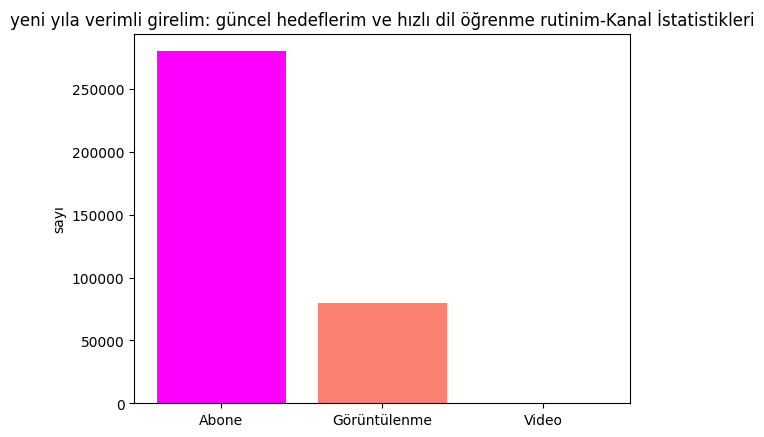

In [93]:
import matplotlib.pyplot as plt

labels = ["Abone", "Görüntülenme", "Video"]
values = [int(subs), int(views), int(video_count)]

plt.bar(labels,values,color=["magenta","salmon","navy"])
plt.title(f"{title}-Kanal İstatistikleri")
plt.ylabel("sayı")
plt.show

In [51]:
data = {
    "Category" : ["Abone","Görüntülenme", "Video"],
    "Value" : [int(subs),int(views),int(video_count)]
}

df = pd.DataFrame(data)
print(df)

       Category     Value
0         Abone    280000
1  Görüntülenme  46403848
2         Video       247


In [57]:
#youtube'da yüklenen tüm videolar uploads'a yükleniyormuş bundan dolayı oradaki tüm videoların id'sini getirdim
request = youtube.channels().list(
    part="contentDetails",
    id="UCRcHYvd4zi0ejbkQLo9raNw"
)

response = request.execute()

uploads_playlist_id = response["items"][0]["contentDetails"]["relatedPlaylists"]["uploads"]

In [84]:
video_ids = []

request = youtube.playlistItems().list(
    part= "contentDetails",
    playlistId= uploads_playlist_id
)

response = request.execute()

for item in response["items"]:
    video_ids.append(item["contentDetails"]["videoId"])



In [85]:
video_data = []

for i in range(0, len(video_ids), 50):
    ids = ','.join(video_ids[i:i+50])
    request = youtube.videos().list(
        part="snippet,statistics",
        id=ids
    )
response = request.execute()

for video in response['items']:
    title = video['snippet']['title']
    date = video['snippet']['publishedAt']
    views = video['statistics'].get('viewCount', 0)
    likes = video['statistics'].get('likeCount', 0)
    comments = video['statistics'].get('commentCount', 0)

video_data.append([title, date, int(views), int(likes), int(comments)])


In [86]:
df_videos = pd.DataFrame(video_data, columns=['Başlık', 'Tarih', 'İzlenme', 'Beğeni', 'Yorum'])
df_videos['Tarih'] = pd.to_datetime(df_videos['Tarih'])
df_videos.sort_values(by='Tarih', ascending=False, inplace=True)

print(df_videos.head())


                                              Başlık  \
0  yeni yıla verimli girelim: güncel hedeflerim v...   

                      Tarih  İzlenme  Beğeni  Yorum  
0 2025-01-07 08:00:19+00:00    79774    2619    470  


In [87]:
top_videos = df_videos.sort_values(by='İzlenme', ascending=False).head(10)
print(top_videos[['Başlık', 'İzlenme']])

                                              Başlık  İzlenme
0  yeni yıla verimli girelim: güncel hedeflerim v...    79774
